Load Forecasting(Hourly) using **ARIMA** model on **Hourly Data**

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 9.5MB/s 
     |████████████████████████████████| 2.1MB 63kB/s 
     |████████████████████████████████| 8.7MB 12.0MB/s 
  Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import csv
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pmdarima
import random
import seaborn as sns
import statsmodels.tsa.stattools as ts
from pmdarima import auto_arima
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Load1.csv to Load1.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Load1.csv']))

In [ ]:
train=df.head(17000)
test=df[17000:]

In [ ]:
pmdarima.arima.ndiffs(train)

0

In [ ]:
Arima_model=auto_arima(train, start_p=6, start_q=6, max_p=24, max_q=24, start_P=0, start_Q=0, max_P=0, max_Q=0, m=1, seasonal=False, trace=True, d=0, D=0, error_action='warn', suppress_warnings=True, random_state =1 , n_fits=1)

Performing stepwise search to minimize aic
Fit ARIMA(6,0,6)x(0,0,0,0) [intercept=True]; AIC=317291.365, BIC=317399.739, Time=85.341 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=373327.824, BIC=373343.306, Time=0.435 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=334159.310, BIC=334182.533, Time=1.143 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=352621.101, BIC=352644.324, Time=6.044 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=413645.672, BIC=413653.413, Time=0.194 seconds
Fit ARIMA(5,0,6)x(0,0,0,0) [intercept=True]; AIC=315706.337, BIC=315806.970, Time=80.523 seconds
Fit ARIMA(4,0,6)x(0,0,0,0) [intercept=True]; AIC=316500.840, BIC=316593.731, Time=71.758 seconds
Fit ARIMA(5,0,5)x(0,0,0,0) [intercept=True]; AIC=317489.675, BIC=317582.567, Time=60.245 seconds
Fit ARIMA(5,0,7)x(0,0,0,0) [intercept=True]; AIC=315862.663, BIC=315971.036, Time=78.589 seconds
Fit ARIMA(4,0,5)x(0,0,0,0) [intercept=True]; AIC=316759.446, BIC=316844.597, Time=60.81

In [ ]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                17000
Model:               SARIMAX(5, 0, 6)   Log Likelihood             -157840.169
Date:                Thu, 02 Jul 2020   AIC                         315706.337
Time:                        14:32:44   BIC                         315806.970
Sample:                             0   HQIC                        315739.522
                              - 17000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4884.8592     92.212     52.974      0.000    4704.126    5065.592
ar.L1          1.0594      0.012     91.653      0.000       1.037       1.082
ar.L2          0.4852      0.018     27.004      0.000       0.450       0.520
ar.L3         -0.0284      0.019     -1.509      0.131      -0.065       0.008
ar.L4         -1.0889      0.017    -62.621      0.000      -1.123      -1.055
ar.L5          0.4629      0.011     42.509      0.000       0.442       0.484
ma.L1          0.5371      0.011     50.023      0.000       0.516       0.558
ma.L2         -0.6013      0.011    -53.044      0.000      -0.623      -0.579
ma.L3         -1.3445      0.012   -109.221      0.000      -1.369      -1.320
ma.L4          0.0237      0.010      2.294      0.022       0.003       0.044
ma.L5          0.5852      0.007     80.566      0.000       0.571       0.599
ma.L6          0.5044      0.006     82.649      0.000       0.492       0.516
sigma2      7.071e+06      0.010   6.91e+08      0.000    7.07e+06    7.07e+06
===================================================================================
Ljung-Box (Q):                    10684.12   Jarque-Bera (JB):            386879.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+24. Standard errors may be unstable.
"""

TypeError: ignored

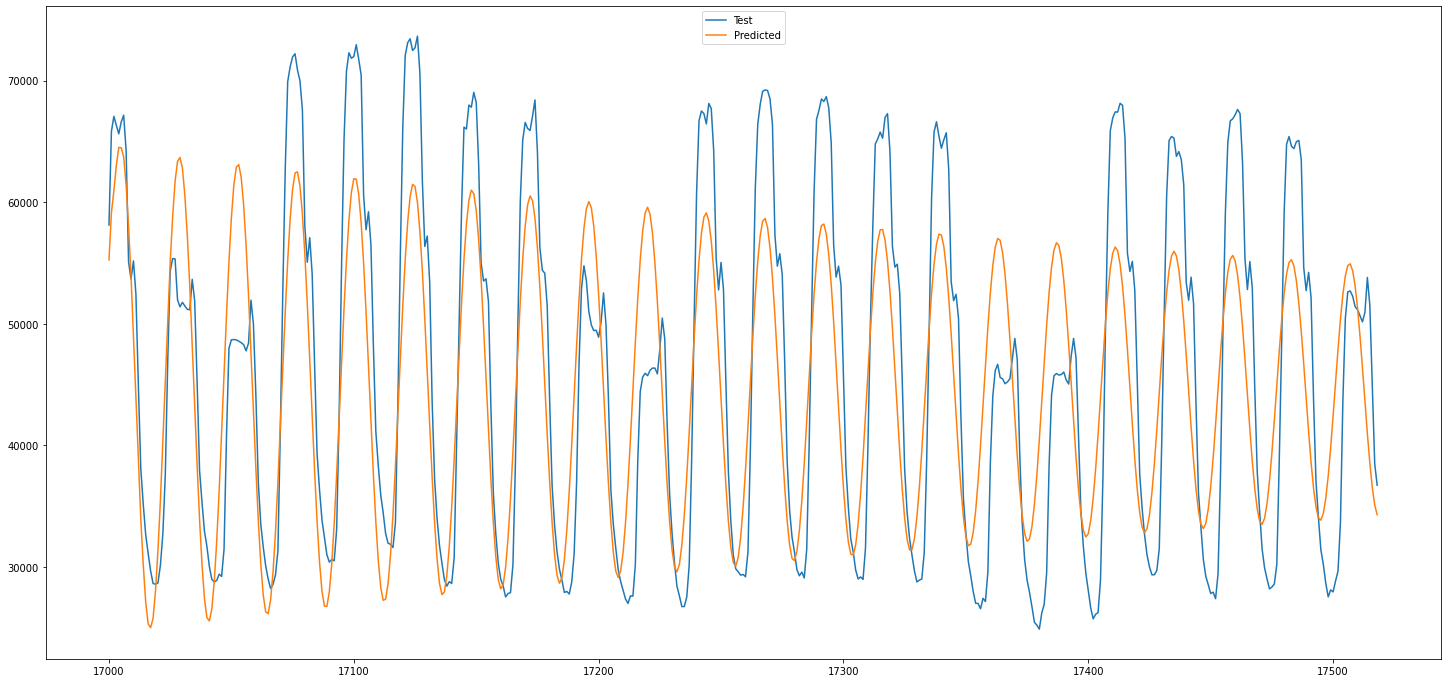

In [ ]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=519), index=test.index)
prediction.columns = ['Predicted_Load']
plt.figure(figsize=(25,12))

#<Figure size 1500x1000 with 0 Axes>
#plt.plot(train, label='Training')
#[<matplotlib.lines.Line2D object at 0x7fbd668fa908>]
plt.plot(test, label='Test')
#[<matplotlib.lines.Line2D object at 0x7fbd6e8871d0>]
plt.plot(prediction, label='Predicted')
#[<matplotlib.lines.Line2D object at 0x7fbd6e87a5c0>]
plt.legend(loc = 'upper center')
plt.xlim([17100,17518])
#<matplotlib.legend.Legend object at 0x7fbd6e887320>
plt.show()


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape=mean_absolute_percentage_error(test, prediction)

In [ ]:
mape

16.955623360845603

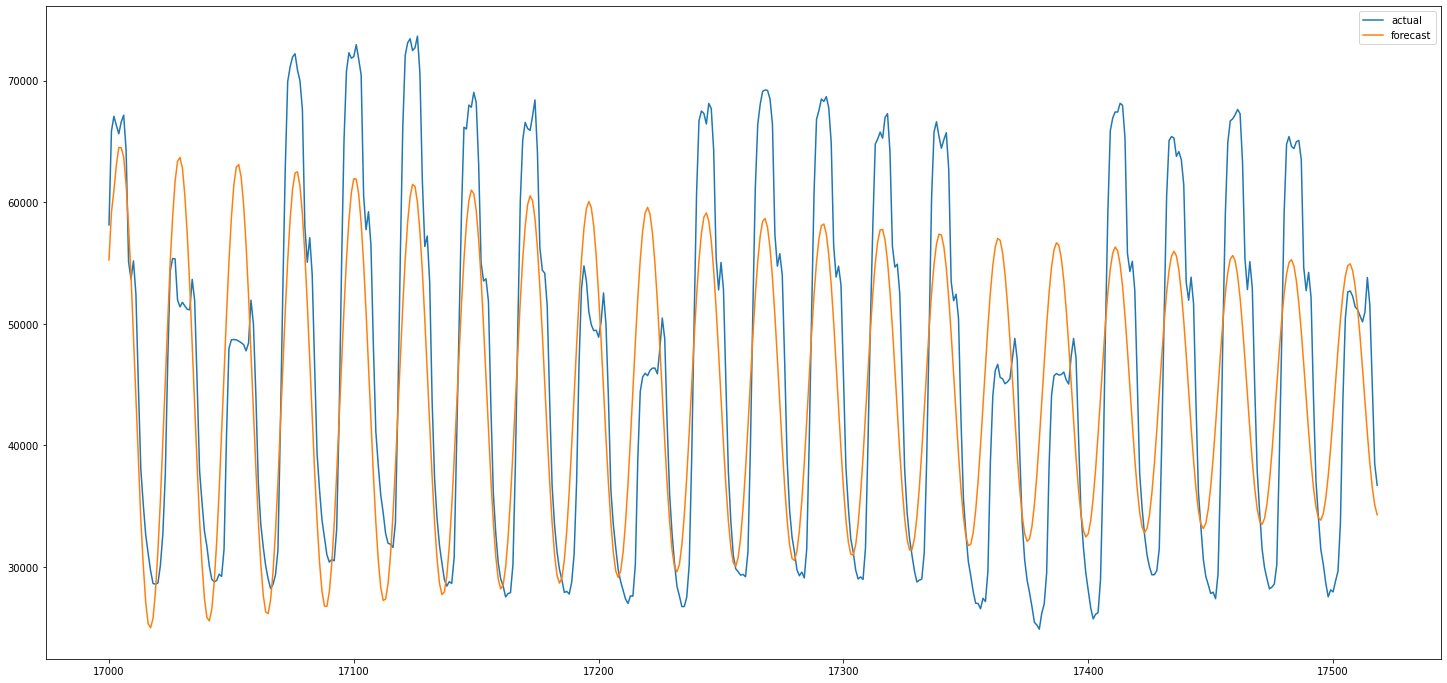

In [ ]:
plt.figure(figsize=(25,12))
plt.plot(test,label='actual')
plt.plot(prediction,label='forecast')
plt.legend()
plt.show()

In [ ]:
model = ARIMA(train, order=(5,0,6))  
fitted = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


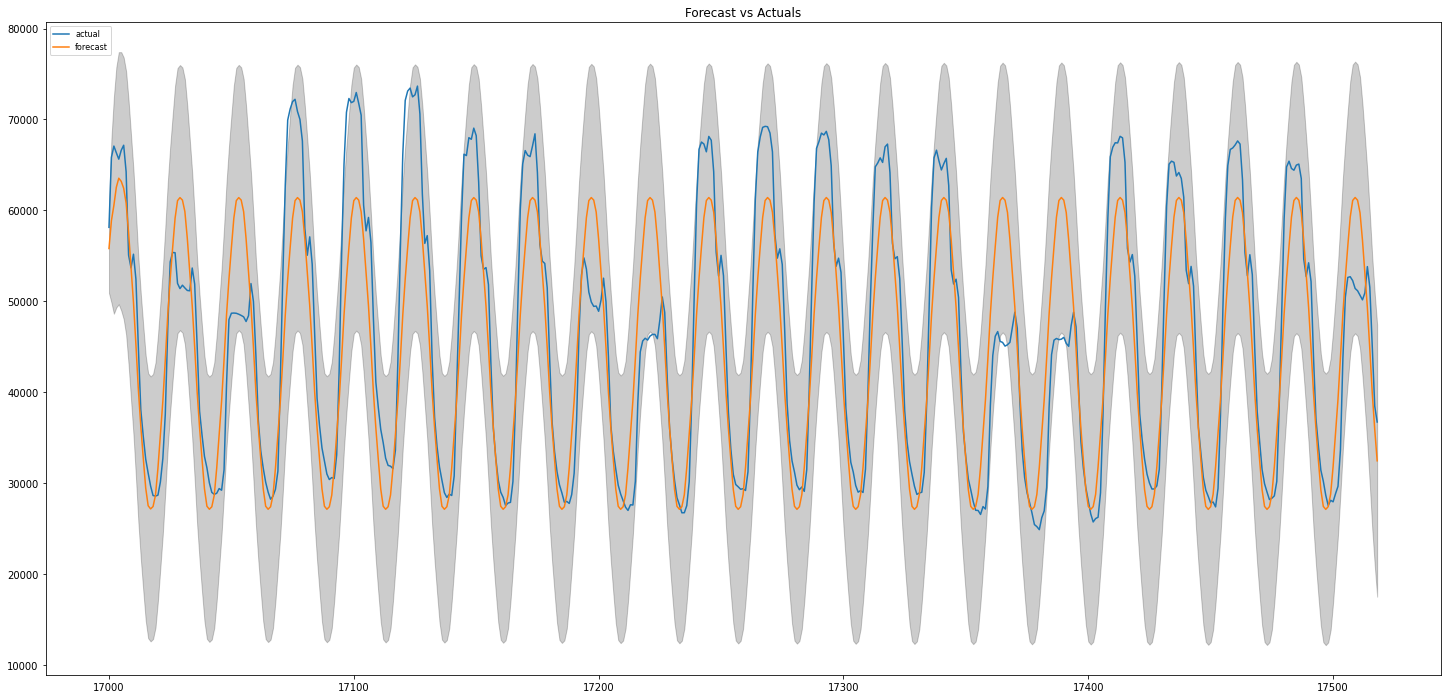

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(519, alpha=0.05)  # 95% conf
#fc, conf  = model.predict(28,alpha=0.001)
# Make as pandas series
fc_series = pd.Series(fc,index=test.index)
lower_series = pd.Series(conf[:, 0],index=test.index)
upper_series = pd.Series(conf[:, 1],index=test.index)

# Plot
plt.figure(figsize=(25,12))
#plt.plot(train, label='training')
plt.xlim=(16000,17518)
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.20)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

plt.show()